<a href="https://colab.research.google.com/github/Viatcheslav1991/Prodjekt-1/blob/main/EDA_Project_3_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# drop — метод для удаления ненужных строк и столбцов (обратите внимание, что в материалах данного модуля этот метод разрешается использовать только для удаления столбцов);

## reviewer_score  - целевой признак

In [165]:
!pip install category_encoders
!pip install scipy
!pip install statsmodels


In [166]:
import pandas as pd

# Импортируем объект Counter из модуля collections
from collections import Counter
import re
import numpy as np
from sklearn import preprocessing
import category_encoders as ce

import matplotlib.pyplot as plt
import seaborn as sns
import os.path


# Для стат тестов импортируем библиотеки и сразу присвоим уровень значимости
import scipy.stats as stats
alpha=0.05


In [167]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [168]:
if os.path.exists('/content/hotels.csv'):
    hotels = pd.read_csv('/content/hotels.csv')

elif os.path.exists('//content/drive/MyDrive/Colab Notebooks/SkilFactory/Блок 3. Разведывательный анализ данных/Проект/hotels.csv'):
    hotels = pd.read_csv('//content/drive/MyDrive/Colab Notebooks/SkilFactory/Блок 3. Разведывательный анализ данных/Проект/hotels.csv')


hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [169]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [170]:
# Создадим словарь список с названиями колонок
listStartCollNames=hotels.columns
listStartCollNames

Index(['hotel_address', 'additional_number_of_scoring', 'review_date',
       'average_score', 'hotel_name', 'reviewer_nationality',
       'negative_review', 'review_total_negative_word_counts',
       'total_number_of_reviews', 'positive_review',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score', 'tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [171]:
hotels.describe(include=[object])

,hotel_address,review_date,hotel_name,reviewer_nationality,negative_review,positive_review,tags,days_since_review
count,386803,386803,386803,386803,386803,386803,386803,386803
unique,1493,731,1492,225,248828,311737,47135,731
top,163 Marsh Wall Docklands Tower Hamlets London ...,8/2/2017,Britannia International Hotel Canary Wharf,United Kingdom,No Negative,No Positive,"[' Leisure trip ', ' Couple ', ' Double Room '...",1 days
freq,3587,1911,3587,184033,95907,26885,3853,1911


In [172]:
hotels.describe()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng
count,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.00000,386803.000000,384355.000000,384355.000000
mean,498.246536,8.397231,18.538988,2743.992042,17.776985,7.17725,8.396906,49.443522,2.823402
std,500.258012,0.547881,29.703369,2316.457018,21.726141,11.05442,1.636090,3.466936,4.579043
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.00000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.00000,7.500000,48.214662,-0.143649
50%,342.000000,8.400000,9.000000,2134.000000,11.000000,3.00000,8.800000,51.499981,-0.000250
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.00000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.00000,10.000000,52.400181,16.429233


In [173]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

### 2. Разбираемся с данными

In [174]:
# Найдём столбцы с пропущенными значениями

hotels.isnull().sum()[hotels.isnull().sum()>0]

,0
lat,2448
lng,2448


In [175]:
List_intCollumns=hotels.select_dtypes(['int64', 'float64']).columns
List_intCollumns

Index(['additional_number_of_scoring', 'average_score',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score', 'lat',
       'lng'],
      dtype='object')

Из за ощибки FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.   придется использовать коробки из библиотеки matplotlib

<Axes: xlabel='review_total_negative_word_counts', ylabel='reviewer_score'>

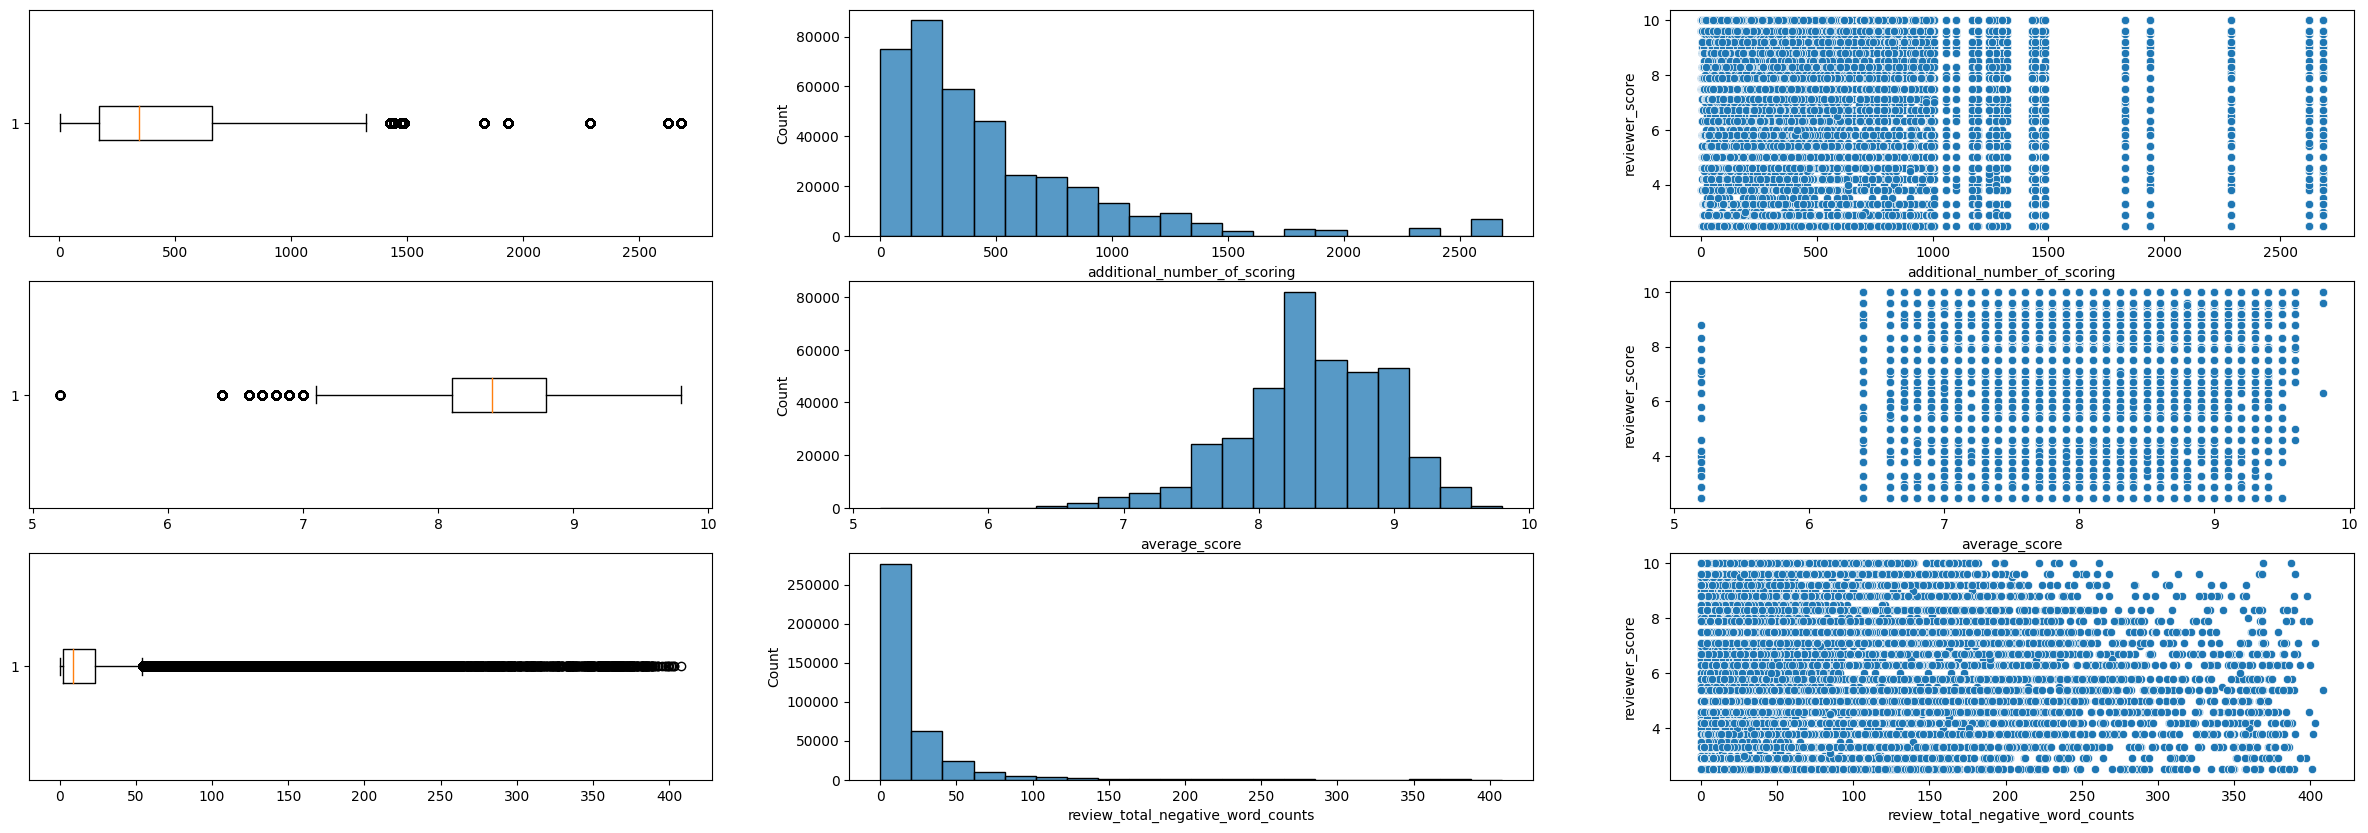

In [176]:
# Нарисуем для каждого Числового признака коробку Тьюкки и Гистограмму и Граффик зависимости целевого признака от текущего

fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(30,10))

# sns.boxplot(x=hotels['additional_number_of_scoring'],ax=axes[(0,0)])
axes[(0,0)].boxplot(x=hotels['additional_number_of_scoring'],vert=False)
sns.histplot(x=hotels['additional_number_of_scoring'],ax=axes[(0,1)],bins=20)
sns.scatterplot(x=hotels['additional_number_of_scoring'],y=hotels['reviewer_score'],ax=axes[(0,2)])

# sns.boxplot(x=hotels['average_score'],ax=axes[(1,0)])
axes[(1,0)].boxplot(x=hotels['average_score'],vert=False)
sns.histplot(x=hotels['average_score'],ax=axes[(1,1)],bins=20)
sns.scatterplot(x=hotels['average_score'],y=hotels['reviewer_score'],ax=axes[(1,2)])

# sns.boxplot(x=hotels['review_total_negative_word_counts'],ax=axes[(2,0)])
axes[(2,0)].boxplot(x=hotels['review_total_negative_word_counts'],vert=False)
sns.histplot(x=hotels['review_total_negative_word_counts'],ax=axes[(2,1)],bins=20)
sns.scatterplot(x=hotels['review_total_negative_word_counts'],y=hotels['reviewer_score'],ax=axes[(2,2)])




<Axes: xlabel='additional_number_of_scoring', ylabel='reviewer_score'>

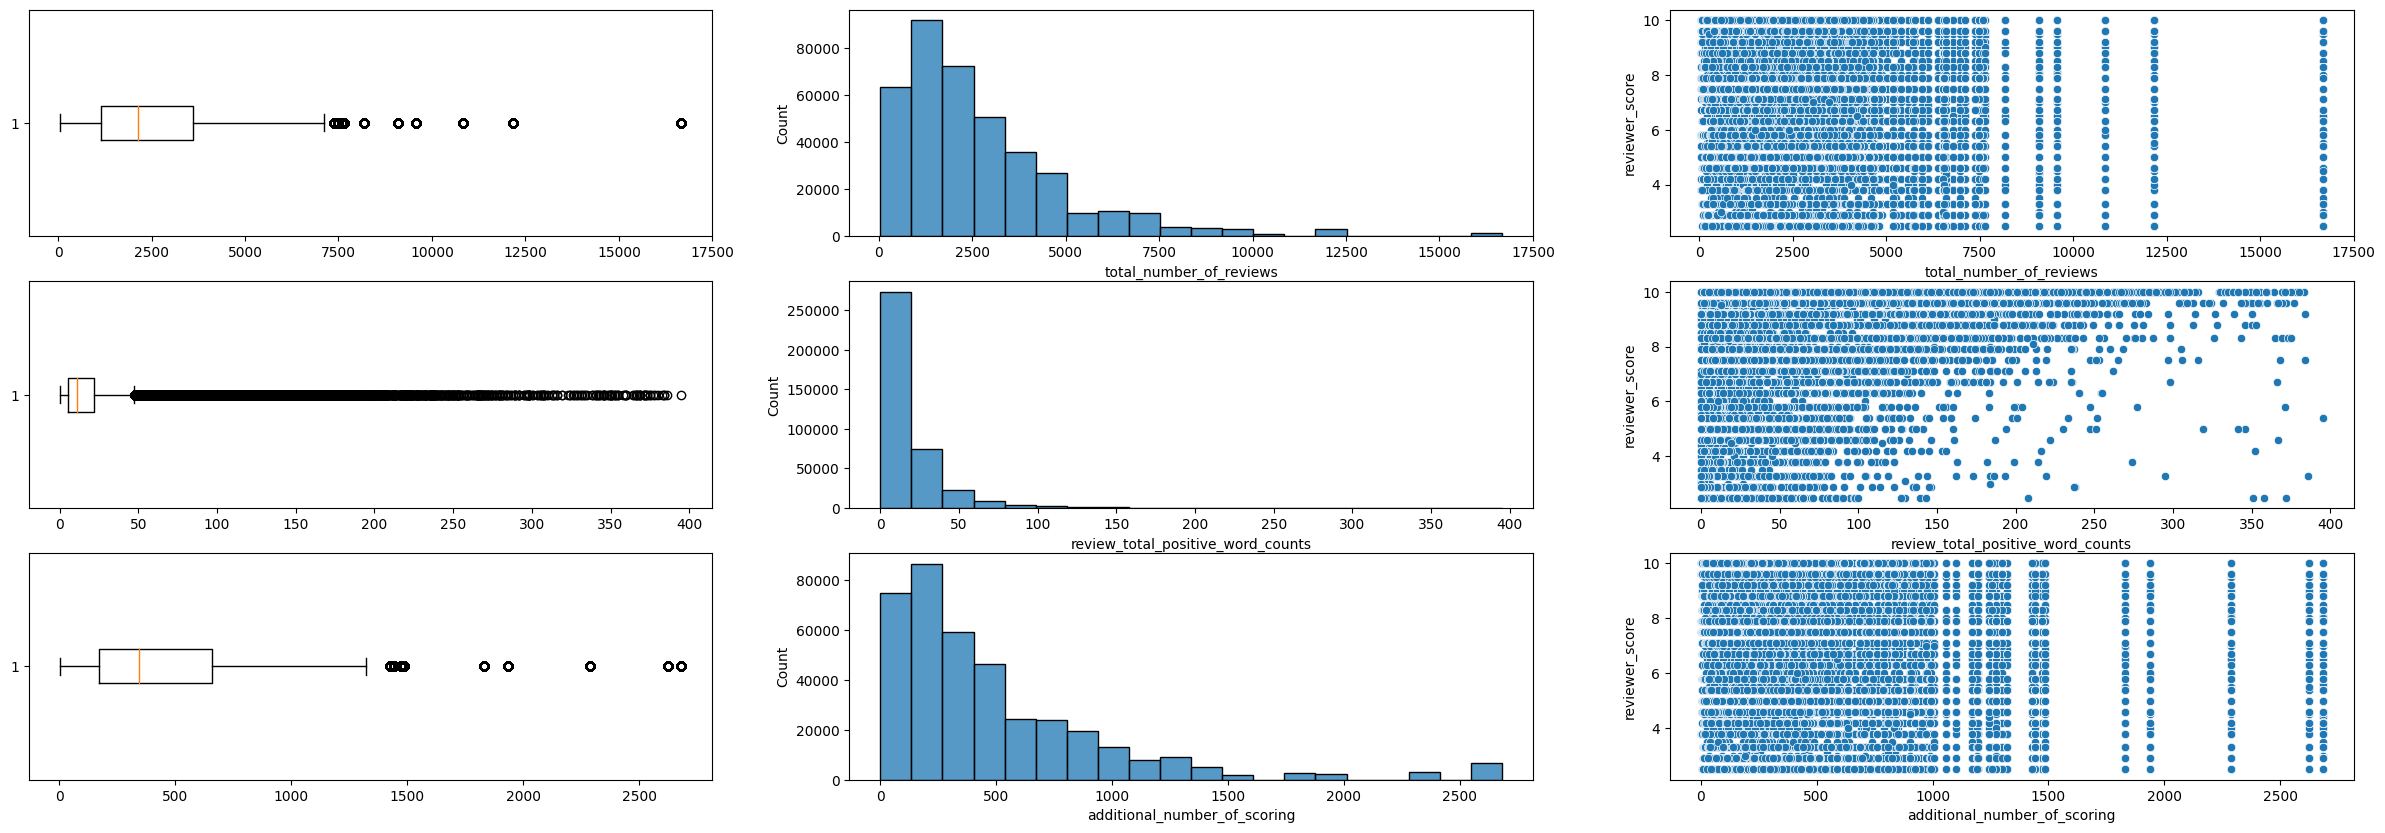

In [177]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(30,10))

# sns.boxplot(x=hotels['total_number_of_reviews'],ax=axes[(0,0)])
axes[(0,0)].boxplot(x=hotels['total_number_of_reviews'],vert=False)
sns.histplot(x=hotels['total_number_of_reviews'],ax=axes[(0,1)],bins=20)
sns.scatterplot(x=hotels['total_number_of_reviews'],y=hotels['reviewer_score'],ax=axes[(0,2)])

# sns.boxplot(x=hotels['review_total_positive_word_counts'],ax=axes[(1,0)])
axes[(1,0)].boxplot(x=hotels['review_total_positive_word_counts'],vert=False)
sns.histplot(x=hotels['review_total_positive_word_counts'],ax=axes[(1,1)],bins=20)
sns.scatterplot(x=hotels['review_total_positive_word_counts'],y=hotels['reviewer_score'],ax=axes[(1,2)])

# sns.boxplot(x=hotels['additional_number_of_scoring'],ax=axes[(2,0)])
axes[(2,0)].boxplot(x=hotels['additional_number_of_scoring'],vert=False)
sns.histplot(x=hotels['additional_number_of_scoring'],ax=axes[(2,1)],bins=20)
sns.scatterplot(x=hotels['additional_number_of_scoring'],y=hotels['reviewer_score'],ax=axes[(2,2)])


На  графиках числовых признаков имеются выбросы .Нужно от них избавится.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='lng', ylabel='reviewer_score'>

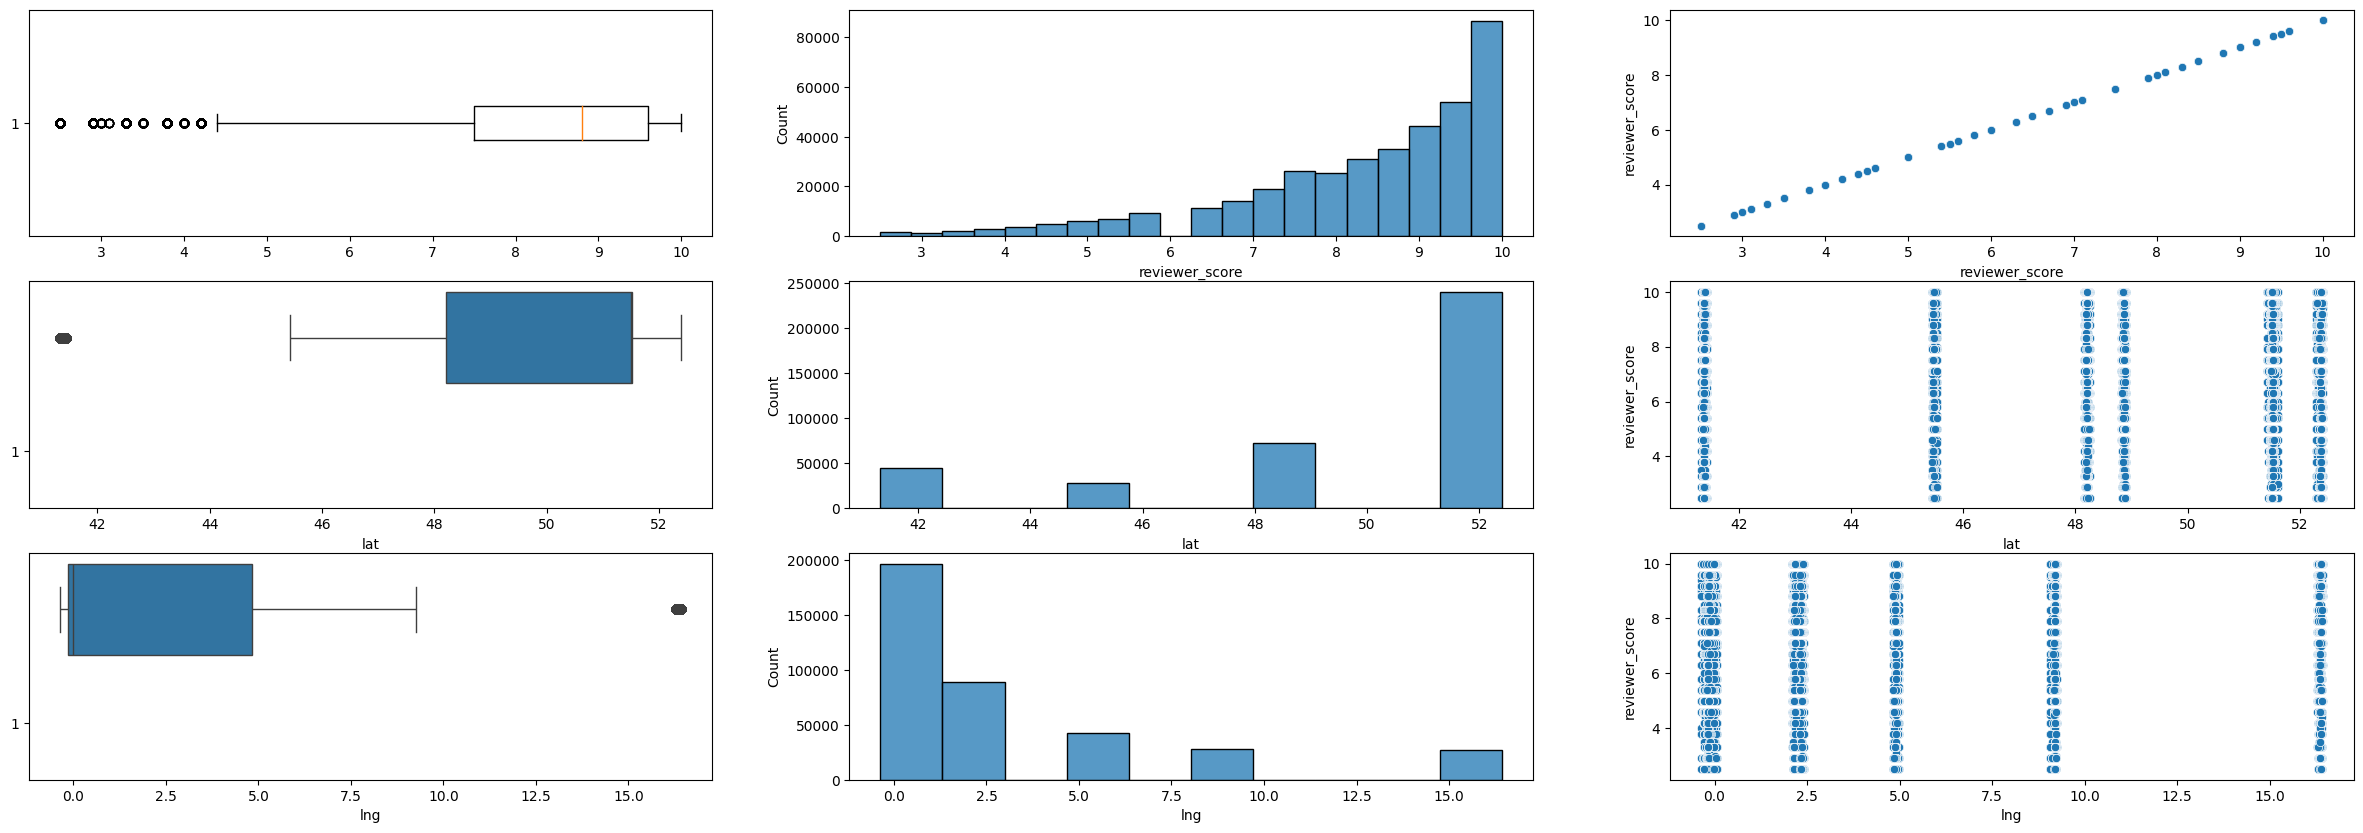

In [178]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(30,10))

# sns.boxplot(x=hotels['reviewer_score'],ax=axes[(0,0)])
axes[(0,0)].boxplot(x=hotels['reviewer_score'],vert=False)
sns.histplot(x=hotels['reviewer_score'],ax=axes[(0,1)],bins=20)
sns.scatterplot(x=hotels['reviewer_score'],y=hotels['reviewer_score'],ax=axes[(0,2)])

sns.boxplot(x=hotels['lat'],ax=axes[(1,0)])
axes[(1,0)].boxplot(x=hotels['lat'],vert=False)
sns.histplot(x=hotels['lat'],ax=axes[(1,1)],bins=10)
sns.scatterplot(x=hotels['lat'],y=hotels['reviewer_score'],ax=axes[(1,2)])

sns.boxplot(x=hotels['lng'],ax=axes[(2,0)])
axes[(2,0)].boxplot(x=hotels['lng'],vert=False)
sns.histplot(x=hotels['lng'],ax=axes[(2,1)],bins=10)
sns.scatterplot(x=hotels['lng'],y=hotels['reviewer_score'],ax=axes[(2,2)])

В данных есть выбросы По заданию нельзя удалять строки поэтому все выбросы которые находятся справа будут  приравнены к 3ей квантиле
те которые слева к 1 й квантиле.
понятно что  reviewer_score  в чистке выбросов не учавствует

На  граффиках scatterplot  ничего не понятно . Кроме одного  review_total_positive_word_counts   там видно что  есть  некая линейная связь

In [179]:
# Удалим из спаиска  Числовых признаков целевой и  будем избовлятся от выбросов

List_intCollumns=list(List_intCollumns)
List_intCollumns.remove("reviewer_score")





In [182]:
# Проверим признаки на нормальность
# К нормальным применим известные методы очистки выбросов
List_NormalColl=[]
List_NotNormalColl=[]

for strCollName in List_intCollumns:


    seriesTestColl=hotels[strCollName]

    # Проведём тест Шапиро_Уика

    _,p=stats.shapiro(seriesTestColl)


    # Если признак распределён не нормально  то возьмём натуральный логарифм и попробуем снова тест Шапиро_Уика
    if p<=alpha:
      seriesTestColl=np.log(seriesTestColl+1)
      _,p=stats.shapiro(seriesTestColl)
    else:
      print(f"{strCollName} прологорифмируем и снова попробуем")

    if p<=alpha:
      print(f"{strCollName} - распределён не нормальное")
      List_NotNormalColl.append(strCollName)
    else:
      print(f"{strCollName} - распределён нормально")
      List_NormalColl.append(strCollName)




/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 386803.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 386803.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 386803.
  res = hypotest_fun_out(*samples, **kwds)


additional_number_of_scoring - распределён не нормальное
average_score - распределён не нормальное
review_total_negative_word_counts - распределён не нормальное
total_number_of_reviews - распределён не нормальное
review_total_positive_word_counts - распределён не нормальное
total_number_of_reviews_reviewer_has_given - распределён не нормальное
lat прологорифмируем и снова попробуем
lat - распределён нормально
lng прологорифмируем и снова попробуем
lng - распределён нормально


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 386803.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 386803.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 386803.
  res = hypotest_fun_out(*samples, **kwds)


Все признаки распределены не нормально - Даже не похоже


In [ ]:
# напишем функцию котрая будет приравнивать выброс к 3ей или 1ой квантили

def

In [ ]:
# Найдём столбцы со строковыми типами данных

hotels.select_dtypes(['object']).columns

Index(['hotel_address', 'review_date', 'hotel_name', 'reviewer_nationality',
       'negative_review', 'positive_review', 'tags', 'days_since_review'],
      dtype='object')

## Работа с датами

In [ ]:
hotels['review_date'].isnull().sum()

0

In [ ]:
hotels['review_date'] = pd.to_datetime(hotels['review_date'])


In [ ]:
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [ ]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386803 non-null  object        
 1   additional_number_of_scoring                386803 non-null  int64         
 2   review_date                                 386803 non-null  datetime64[ns]
 3   average_score                               386803 non-null  float64       
 4   hotel_name                                  386803 non-null  object        
 5   reviewer_nationality                        386803 non-null  object        
 6   negative_review                             386803 non-null  object        
 7   review_total_negative_word_counts           386803 non-null  int64         
 8   total_number_of_reviews                     386803 non-null  int64        

In [ ]:
hotels["review_date"].min()

hotels["review_date"].max()

print( f"самый свежий отзыв {hotels['review_date'].max()}   самый первый отзыв {hotels['review_date'].min()}" )

самый свежий отзыв 2017-08-03 00:00:00   самый первый отзыв 2015-08-04 00:00:00


In [ ]:

# теги находятся внутри строки которая представляет собой список - нужно для кажного тега в таблице создать столбец с бинарным признаком
# 1 найдём все уникальные теги собрав их в коллекцию

# Создадим лист для коолекции
tags_set=set()

# Напишем функцию  которая превратит строку в список
# И добавит все теги во множество






def ConvertToList(test_string :str ,tags_set:set):
  # убираем лишние конструкции
  List_add=test_string.replace("'","").replace("[","").replace("]","").strip().split(" ,  ")
  # добавляем во  множество
  # global list_add_Tags
  # list_add_Tags=list_add_Tags+List_add
  tags_set.update(set(List_add))
  return  List_add




In [ ]:
# Получаем котонку содержащую списки

# hotels=hotels.head(7)

hotels["tags_list"]=hotels["tags"].apply(ConvertToList,tags_set=tags_set)

In [ ]:
# Добавим колонку количества тегов

In [ ]:
hotels["Tags_Count"]=hotels["tags_list"].apply(lambda x: len(x))

In [ ]:
TagsHotelsDf=hotels["tags_list"].explode()
TagsHotelsDf =pd.DataFrame(TagsHotelsDf)
TagsHotelsDf["index_from_hotels"]=TagsHotelsDf.index
TagsHotelsDf

,tags_list,index_from_hotels
0,Leisure trip,0
0,Couple,0
0,Studio Suite,0
0,Stayed 2 nights,0
0,Submitted from a mobile device,0
...,...,...
386801,Stayed 2 nights,386801
386802,Leisure trip,386802
386802,Couple,386802
386802,Bunk Bed Room,386802


In [ ]:
print(f"уникальных тегов представлено в наборе данных {len(tags_set)}")
# Если для каждого тега создать свою колонку Дана сет увеличится на на 2368 колонок

уникальных тегов представлено в наборе данных 2368


In [ ]:
modeTag=TagsHotelsDf["tags_list"].value_counts()[TagsHotelsDf["tags_list"].value_counts()==TagsHotelsDf["tags_list"].value_counts().sort_values(ascending=False).iloc[0]].index[0]
print(f"Наиболее часто встречающийся тег {modeTag}")


Наиболее часто встречающийся тег Leisure trip


In [ ]:
TagsHotelsDf

,tags_list,index_from_hotels
0,Leisure trip,0
0,Couple,0
0,Studio Suite,0
0,Stayed 2 nights,0
0,Submitted from a mobile device,0
...,...,...
386801,Stayed 2 nights,386801
386802,Leisure trip,386802
386802,Couple,386802
386802,Bunk Bed Room,386802


In [ ]:
NightCount=TagsHotelsDf["tags_list"].apply(lambda x : True if  re.fullmatch(r"[S,s]tayed \d{1,} [N,n]ights{0,1}", x) is not None else False)

In [ ]:
NightCount

,tags_list
0,False
0,False
0,False
0,True
0,False
...,...
386801,True
386802,False
386802,False
386802,False


In [ ]:
modse_Count_Night=TagsHotelsDf[NightCount]["tags_list"].value_counts().sort_values(ascending=False).index[0]

In [ ]:
modse_Count_Night

'Stayed 1 night'

In [ ]:
modse_Count_Night_int=re.search(r"\d{1,}",modse_Count_Night)[0]
modse_Count_Night_int

'1'

In [ ]:



print(f"Чаще всего останавливаются путешественники в отелях на {modse_Count_Night_int} ночь(ночей)")

Чаще всего останавливаются путешественники в отелях на 1 ночь(ночей)


In [ ]:
TagsHotelsDf_value_count=TagsHotelsDf["tags_list"].value_counts()

# Поработаем с признаком тега
оставим только те теги котрые встречаются в 1% строк

In [ ]:
# Добавим в таблицу отелей признак номера строки

hotels["index_from_hotels"]=hotels.index

In [ ]:
TagsHotelsDf_value_count[TagsHotelsDf_value_count>hotels.shape[0]*0.05]

,count
tags_list,
Leisure trip,313593
Submitted from a mobile device,230778
Couple,189212
Stayed 1 night,145373
Stayed 2 nights,100263
Solo traveler,81235
Stayed 3 nights,72000
Business trip,61989
Group,49088


In [ ]:
# Соберём список теги которые встречаются в более чем в 5% строк

List_FamosTags=TagsHotelsDf_value_count[TagsHotelsDf_value_count>hotels.shape[0]*0.05].index
List_FamosTags


Index(['Leisure trip', 'Submitted from a mobile device', 'Couple',
       'Stayed 1 night', 'Stayed 2 nights', 'Solo traveler', 'Stayed 3 nights',
       'Business trip', 'Group', 'Family with young children',
       'Stayed 4 nights', 'Double Room', 'Standard Double Room',
       'Superior Double Room', 'Family with older children'],
      dtype='object', name='tags_list')

In [ ]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 20 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386803 non-null  object        
 1   additional_number_of_scoring                386803 non-null  int64         
 2   review_date                                 386803 non-null  datetime64[ns]
 3   average_score                               386803 non-null  float64       
 4   hotel_name                                  386803 non-null  object        
 5   reviewer_nationality                        386803 non-null  object        
 6   negative_review                             386803 non-null  object        
 7   review_total_negative_word_counts           386803 non-null  int64         
 8   total_number_of_reviews                     386803 non-null  int64        

In [ ]:
# теперь добавим эти теги в таблицу отелей  методом Merge

collName='Leisure trip'

for collName in List_FamosTags:

    TegTableForMerge=TagsHotelsDf[TagsHotelsDf["tags_list"]==collName].copy()

    TegTableForMerge.loc[:,"Tags_"+collName]=1

    TegTableForMerge.drop(["tags_list"],axis=1,inplace=True)


    hotels=hotels.merge(TegTableForMerge,how='left',left_on="index_from_hotels",right_on="index_from_hotels")

    hotels.fillna({"Tags_"+collName:0},inplace=True)

# Разберём признак даты

In [ ]:
# Достанем значение года из даты и добавим как отдельный признак

hotels["review_date_year"]=hotels["review_date"].dt.year

# получим из даты значение месяца и дня недели

hotels["review_date_day_of_week"]=hotels["review_date"].dt.strftime("%A")
hotels["review_date_month"]=hotels["review_date"].dt.strftime("%B")

<BarContainer object of 3 artists>

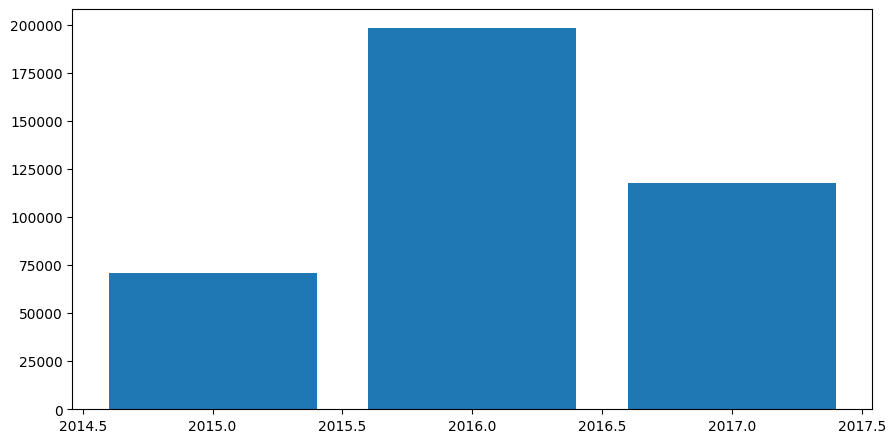

In [ ]:
df_for_graph=hotels["review_date_year"].value_counts()

fig=plt.figure(figsize=(8,4))
axes=fig.add_axes([0,0,1,1])

axes.bar(x=df_for_graph.index,height=df_for_graph)

Борльше всего оецензий было сделано в  2016 году

In [ ]:
# закодируем признаки  дня недели и названия месяца One-Hot кодированием

# День недели
encoder=ce.OneHotEncoder(cols=["review_date_day_of_week"],use_cat_names=True)

type_bin=encoder.fit_transform(hotels['review_date_day_of_week'])

hotels=pd.concat([hotels,type_bin],axis=1)


# Месяц

encoder=ce.OneHotEncoder(cols=["review_date_month"],use_cat_names=True)

type_bin=encoder.fit_transform(hotels['review_date_month'])

hotels=pd.concat([hotels,type_bin],axis=1)



# Разберём признак days_since_review

In [ ]:
# Работа с признаком days_since_review — количество дней между датой проверки и датой очистки;
hotels["days_since_review_count_day"]=hotels["days_since_review"].apply(lambda x: int( re.search(r"\d{1,}", x)[0]))


hotels["days_since_review_count_day"].describe()
# Медиана и Среденее аРЕФМЕТИЧЕСКОЕ МЕНЬШЕ МАКСИМУМА В 2 РАза
#  инициализируем нормализатор MinMaxScaler


,days_since_review_count_day
count,386803.000000
mean,354.387978
std,208.975174
min,0.000000
25%,175.000000
50%,353.000000
75%,527.000000
max,730.000000


In [ ]:
mm_scaler=preprocessing.MinMaxScaler()

df_mm=mm_scaler.fit_transform(pd.DataFrame(hotels["days_since_review_count_day"]))

df_mm=pd.DataFrame(df_mm,columns=["days_since_review_count_day"])


hotels["days_since_review_count_day_MinMaxScaler"]=df_mm["days_since_review_count_day"]

У нас average_score это средний бал отеля  и мы нашли среднее арефметическое для признака reviewer_score . для всех отелей  найдём разницу этих значений  и добавим  в таблицу . Вычитать будем  из reviewer_score   average_score

# hotel_name  -работа с признаком



In [ ]:
hotel_name_hotels_value_counts=hotels["hotel_name"].value_counts().sort_values(ascending=False)

# Отелей слишком много. Нужно отсеять часть названий которые встречаются слишком редко .
# Оставим только не отели которые встречаются почаще. А именно возьмём отели которые стречаются в 5% строк



In [ ]:
DF_For_Coding=(hotel_name_hotels_value_counts[hotel_name_hotels_value_counts>hotels.shape[0]*0.05])



нет на столько популярного отеля который бы фигурировал в  5% строк
Поэтому просто возьмём первые 10 отелей  - типо топ . И создадим флаг популярности. Если он будет не информативен избавимся от него

In [ ]:
DF_For_Coding=(hotel_name_hotels_value_counts[hotel_name_hotels_value_counts>1000])
DF_For_Coding.sum()

list_famous_Hotels=DF_For_Coding.index
list_famous_Hotels

hotels["hotel_name_famous_bool"]=hotels["hotel_name"].isin( list_famous_Hotels)


hotels["hotel_name_famous"]=0
hotels.loc[hotels[hotels["hotel_name_famous_bool"]].index,["hotel_name_famous"]]=1
hotels.loc[hotels[hotels["hotel_name_famous_bool"]==False].index,["hotel_name_famous"]]=0
hotels["hotel_name_famous"]=hotels["hotel_name_famous"].astype(int)



# hotel_address  -Нужно достать название страны и Города

In [ ]:
# У нас есть столбец со страной проживания рецензента возьмём из него все уникальные значения

list_country=hotels["reviewer_nationality"].value_counts().index
# Уберём пробелы в начале и конце

def strip_str (string :str):
  if string!='':
       return string.strip()
list_country=list(map (strip_str,list_country))






Посмотрим на топ стран из которых родом рецензенты

<BarContainer object of 5 artists>

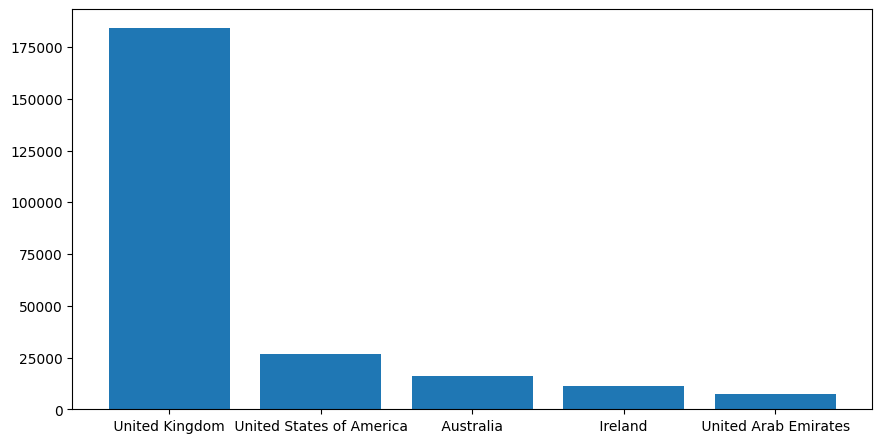

In [ ]:
df_for_figure=hotels["reviewer_nationality"].value_counts().sort_values(ascending=False)[:5]
fig=plt.figure(figsize=(8,4))
axes=fig.add_axes([0,0,1,1])
axes.bar(x=df_for_figure.index ,height=df_for_figure)


Видно что у нас  половина рецензентов из Англии добавим флаг англичанина

In [ ]:
hotels["reviewer_nationality_United_Kingdom"]=hotels["reviewer_nationality"].apply(lambda x : 1 if x.lower().replace(" ","")=="United Kingdom".lower().replace(" ","")  else 0)



In [ ]:
# Список стран  код представленный выше долго выполняется

# list_country=["United Kingdom","Spain","France","Netherlands","Austria","Italy"]

Адрес Отеля перекликается с его географическим положением .Но в геолокации есть пропуски . Заполним их достав из адреса город и страну .

In [ ]:
hotels["hotel_address"]

# теперь будем проверять наличие названия страны в адресе
# и если название есть то укажем название страны

# функция для проверки названия страны



def take_country(hotel_address, country_name):
      if country_name.lower().replace(" ","") in hotel_address.lower().replace(" ",""):
        return  country_name

hotels["hotel_address_country"]=None


for country_name in list_country:

    hotels.loc[hotels[hotels["hotel_address_country"].isnull()].index,["hotel_address_country"]]=hotels["hotel_address"].apply(take_country,country_name=country_name)





In [ ]:
hotels["hotel_address_country"].value_counts()

,count
hotel_address_country,
United Kingdom,196774
Spain,45132
France,44830
Netherlands,43006
Austria,29178
Italy,27883


In [ ]:
# У нас всего 5 стран для проверки
# это значит 1 мы можем достать название города так как  принцеп формирования адреса в разных странах свой папример у United Kingdom  после города есть 2 3х символьные конструкции
# У Spain перед городом есть 5 цифр
# У France перед городом есть 5 цифр
# У Netherlands перед городом есть 4  цифры
# У Austria перед городом есть 4  цифры
# У Italy перед городом есть 5  цифр

# hotels[hotels["hotel_address_country"]=="Italy"]["hotel_address"].iloc[4545]

In [ ]:
# Данная функция  будет вытаскивать  названрие города + какойто признак района

def take_city(row):
      Country_name=row["hotel_address_country"]
      hotel_address=row["hotel_address"]
      City_name="Ошибка поиска города"

      if Country_name=="United Kingdom":
        City_name=hotel_address.replace(Country_name,"").strip().split(" ")[-4:-2]
        City_name=" ".join(City_name)


      if Country_name=="Spain":
        City_name=hotel_address.replace(Country_name,"").strip().split(" ")[-2:]
        City_name=" ".join(City_name)



      if Country_name=="France":
        City_name=hotel_address.replace(Country_name,"").strip().split(" ")[-2:]
        City_name=" ".join(City_name)


      if Country_name=="Netherlands":
        City_name=hotel_address.replace(Country_name,"").strip().split(" ")[-3:]
        City_name=" ".join(City_name)

      if Country_name=="Austria":
        City_name=hotel_address.replace(Country_name,"").strip().split(" ")[-2:]
        City_name=" ".join(City_name)


      if Country_name=="Italy":
        City_name=hotel_address.replace(Country_name,"").strip().split(" ")[-2:]
        City_name=" ".join(City_name)


      return City_name



# hotel_address ="21 Piccadilly Westminster Borough London W1J 0BH United Kingdom"
# Country_name="United Kingdom"


# hotel_address ="Calabria 90 92 Eixample 08015 Barcelona Spain"
# Country_name="Spain"


# hotel_address ="20 Rue Jean Rey 15th arr 75015 Paris France"
# Country_name="France"

# hotel_address ="IJdock 6 Amsterdam City Center 1013 MM Amsterdam Netherlands"
# Country_name="Netherlands"


# hotel_address ="Schlossallee 8 14 Penzing 1140 Vienna Austria"
# Country_name="Austria"

hotel_address ="Piazza Duca D Aosta 4 6 Central Station 20124 Milan Italy"
Country_name="Italy"




# take_city(hotel_address , Country_name)

In [ ]:
hotels["hotel_address_city_name"]=hotels.apply( take_city,axis=1 )




In [ ]:
hotels[["hotel_address_city_name"]].value_counts()

,count
hotel_address_city_name,
Borough London,68042
Chelsea London,31789
Camden London,21472
London London,13888
Hamlets London,9493
...,...
20142 Milan,23
1230 Vienna,17
1017 JW Amsterdam,16


In [ ]:
# Закодируем название страны Бинарным кодированием
bin_encoder=ce.OneHotEncoder(cols=["hotel_address_country"],use_cat_names=True)

type_bin=bin_encoder.fit_transform(hotels["hotel_address_country"])
hotels=pd.concat([hotels,type_bin],axis=1)

# lat — географическая широта отеля;
# lng — географическая долгота отеля.

нужно заполнить пропуски

In [ ]:
hotels["lng"].isnull().sum()

2448

In [ ]:
hotels[["hotel_address","hotel_address_city_name","lat","lng"]][hotels["lng"].isnull()]["hotel_address_city_name"].value_counts()

,count
hotel_address_city_name,
1080 Vienna,536
1090 Vienna,520
1020 Vienna,421
75008 Paris,224
1030 Vienna,182
1190 Vienna,156
1160 Vienna,141
08010 Barcelona,113
75018 Paris,47


In [ ]:
# Из ранее полученного признака Города мы можем достать адрес  и заполнить пропущенную геолокацию

# 1 Получем все города   с пропусками в гео локации

lat_nulls=hotels[hotels["lat"].isnull()]["hotel_address_city_name"].unique()

# 2 Получим для городов указынных выше их гео локации

df_merge_lat_not_null=hotels[(hotels["lat"].isnull()==False) & (hotels["hotel_address_city_name"].isin (lat_nulls) )][["hotel_address_city_name","lat","lng"]]


# 3 получим моду для каждого  города
df_merge_lat_not_null=df_merge_lat_not_null.groupby(by=["hotel_address_city_name"]).agg(lambda x :x.mode())


# 4 В таблице отелей заполним пропуски в гео локации






In [ ]:

# 4 В таблице отелей заполним пропуски в гео локации
# так как  значений не много  заполним пропуски используя цикл for

for row_Megge_table in df_merge_lat_not_null.index:

    hotels.loc[  hotels[(hotels["lat"].isnull())& (hotels["hotel_address_city_name"]==row_Megge_table)].index ,  "lat"     ]=(df_merge_lat_not_null.loc[row_Megge_table,"lat"])
    hotels.loc[  hotels[(hotels["lng"].isnull())& (hotels["hotel_address_city_name"]==row_Megge_table)].index ,  "lng"     ]=(df_merge_lat_not_null.loc[row_Megge_table,"lng"])

# Пропуски в столбцах lat  lng  -заполнены

In [ ]:
# Уберём у Признака города - доп индекс
def take_city_DELL_INDEX(row):
      Country_name=row["hotel_address_country"]
      hotel_address=row["hotel_address"]
      City_name="Ошибка поиска города"

      if Country_name=="United Kingdom":
        City_name=hotel_address.replace(Country_name,"").strip().split(" ")[-3:-2]
        City_name=" ".join(City_name)


      if Country_name=="Spain":
        City_name=hotel_address.replace(Country_name,"").strip().split(" ")[-1:]
        City_name=" ".join(City_name)



      if Country_name=="France":
        City_name=hotel_address.replace(Country_name,"").strip().split(" ")[-1:]
        City_name=" ".join(City_name)


      if Country_name=="Netherlands":
        City_name=hotel_address.replace(Country_name,"").strip().split(" ")[-1:]
        City_name=" ".join(City_name)

      if Country_name=="Austria":
        City_name=hotel_address.replace(Country_name,"").strip().split(" ")[-1:]
        City_name=" ".join(City_name)


      if Country_name=="Italy":
        City_name=hotel_address.replace(Country_name,"").strip().split(" ")[-1:]
        City_name=" ".join(City_name)


      return City_name



In [ ]:
hotels["hotel_address_city_name"]=hotels.apply( take_city_DELL_INDEX,axis=1 )


In [ ]:
# Закодируем название города Бинарным кодированием
bin_encoder=ce.BinaryEncoder(cols=["hotel_address_city_name"])

type_bin=bin_encoder.fit_transform(hotels["hotel_address_city_name"])
hotels=pd.concat([hotels,type_bin],axis=1)

# Поработаем с признаком комментарий и количеством слов в комментаррии

Среди отзывов есть  упоминание

Location - локации

Everything  - всё  

Breakfast  - завтрак

это кондидаты стать отдельными признаками

но для начала надо поработать с текстом и достать их

Так как в одной строке может быть несколько


In [ ]:

# Подправим количество слов в столбца где присутстсвутет no positive  - вначале найдём все синонимы а потом изменим на no positive  а дальше заменим кол-во слов на 0

hotels["positive_review"]=hotels["positive_review"].apply(lambda x: x.lower().strip())
list_no_positive=["nothing","n a","none"]
hotels.loc[hotels[hotels["positive_review"].isin(list_no_positive)].index,["positive_review"]]="no positive"
hotels.loc[hotels[hotels["positive_review"]=="no positive"].index,["review_total_positive_word_counts"]]=0

hotels["positive_review"]=hotels["positive_review"].apply(lambda x: x.lower().replace("the ","").replace("and ","").replace("hotel","").strip())




# Избавимся от слов качества  comfy friendly  comfortable   helpful

# Заменим редко встречающиеся прилогательные на часто
# comfy  и  comfortable и helpful  на good

hotels["positive_review"]=hotels["positive_review"].apply(lambda x: x.lower().replace("comfortable ","good").replace("helpful ","good").replace("friendly ","good").replace("comfy ","good").replace( "nice ","good").replace("very good","great") .replace( "fantastic ","great")  .replace( "amazing ","great").strip())

# Добавим столбцы для эмоцианальной окраски  -т.е
# соберём словарь с эмоциональной оценкой


dictHappy={"good":1,
           "great":2,
           "perfect":3,
            "excellent":4
}

hotels["positive_review_level_of_joy"]=1
hotels["positive_review_level_of_joy"]=hotels["positive_review"].apply(lambda x: 2 if "great" in x else  3 if "perfect" in x else  4 if  "excellent" in x else 1)
# Для строк где нет положительного комментария проставим 0
hotels.loc[hotels[hotels["positive_review"]=="no positive"].index,["positive_review_level_of_joy"]]=0
# теперь избавимся от слов эмоциональной окраски в комментариях

# Регулярным вывражением избавимся от определений is great  например
Regex_pattren="((was)|(is)|(were)|(are)) [a-z]{1,}"
hotels["positive_review"]=hotels["positive_review"].apply(lambda x: re.sub(Regex_pattren, "",  x, count=0))



hotels["positive_review"]=hotels["positive_review"].apply(lambda x: x.lower().replace("good","").replace("great","").replace("perfect","").replace("excellent","").replace("  "," ").strip())

# У некоторых комментарием есть синонимы - подведём их под единое определение

hotels["positive_review"]=hotels["positive_review"].apply(lambda x: x.lower().replace("every thing","everything").replace("all","everything").replace("position","location").replace("rooms","room").replace("beds","bed").replace("food","breakfast").replace("comfort","room").replace("cleanliness","clean").replace("service","staff").strip())





# Вынесем location в отдельный признак и удалим упоминание локации из комментария

hotels["positive_review_location"]=hotels["positive_review"].apply(lambda x: 1 if "location" in x else 0 )
hotels["positive_review"]=hotels["positive_review"].apply(lambda x: x.lower().replace("location","").strip())



hotels["positive_review_everything"]=hotels["positive_review"].apply(lambda x: 1 if "everything" in x else 0 )
hotels["positive_review"]=hotels["positive_review"].apply(lambda x: x.lower().replace("everything","").strip())


hotels["positive_review_Breakfast"]=hotels["positive_review"].apply(lambda x: 1 if "breakfast" in x else 0 )
hotels["positive_review"]=hotels["positive_review"].apply(lambda x: x.lower().replace("breakfast","").strip())


hotels["positive_review_staff"]=hotels["positive_review"].apply(lambda x: 1 if "staff" in x else 0 )
hotels["positive_review"]=hotels["positive_review"].apply(lambda x: x.lower().replace("staff","").strip())

hotels["positive_review_staff"]=hotels["positive_review"].apply(lambda x: 1 if "clean" in x else 0 )
hotels["positive_review"]=hotels["positive_review"].apply(lambda x: x.lower().replace("clean","").strip())

hotels["positive_review_staff"]=hotels["positive_review"].apply(lambda x: 1 if "room" in x else 0 )
hotels["positive_review"]=hotels["positive_review"].apply(lambda x: x.lower().replace("room","").strip())

hotels["positive_review_staff"]=hotels["positive_review"].apply(lambda x: 1 if "bed" in x else 0 )
hotels["positive_review"]=hotels["positive_review"].apply(lambda x: x.lower().replace("bed","").strip())

# Избавимся от упоминание ранее добавленных слов
# hotels["positive_review"]=hotels["positive_review"].apply(lambda x: x.lower().replace("location","").replace("everything","").replace("breakfast","").replace("staff","").strip())


hotels["positive_review"].value_counts().head(30)

,count
positive_review,
,51716
no positive,28259
helpful,1283
able,1249
lovely,1039
facilities,1013
friendly,886
very,865
quiet,673


Посмотрим на уникальные значения в  негативных комментариях

In [ ]:
hotels["negative_review"].value_counts().head(30)
hotels.groupby(by=["negative_review"])["review_total_negative_word_counts"].agg(['median','count']).sort_values(by=['count'],ascending=False).head(30)

,median,count
negative_review,,
No Negative,0.0,95907
Nothing,2.0,10737
Nothing,3.0,3154
nothing,2.0,1660
N A,3.0,802
None,2.0,737
,2.0,606
N a,3.0,384
Breakfast,2.0,296


In [ ]:
# Среди негативных комментариев есть положительные комментарии с эмоциональной окраской

hotels["negative_review_level_of_joy"]=hotels["negative_review"].apply(lambda x: 2 if "great" in x else  3 if "perfect" in x else  4 if  "excellent" in x else 0)




In [ ]:
# Перенесём все положительные оценки в ранее созданный столбец positive_review_level_of_joy
hotels["positive_review_level_of_joy"]=hotels.apply(lambda Row: Row["negative_review_level_of_joy"] if Row["negative_review_level_of_joy"]>Row["negative_review_level_of_joy"] else Row["positive_review_level_of_joy"]  ,axis =1)

In [ ]:



# Заменим комментарии которые положительные  являются нейтральными  но почемуто попали в столбец негативных

hotels["negative_review"]=hotels["negative_review"].apply(lambda x: x.lower().strip())
list_no_negative=["nothing","n a","none","nothing really","all good","nothing at all","na","liked everything"
,"i liked everything","everything was good","everything was perfect","nothing to dislike","everything was great","non","nothing it was perfect","everything was fine"
,"all was good","nothing all good","nothing everything was perfect","absolutely nothing","no complaints","nothing everything was great"]

hotels.loc[hotels[hotels["negative_review"].isin(list_no_negative)].index,["negative_review"]]="no negative"
hotels.loc[hotels[hotels["negative_review"]=="no negative"].index,["review_total_negative_word_counts"]]=0

In [ ]:
# Для удобства поиска нпишем функцию которая будет находить все строки в которых существует отпределённое слово
def find_text(df,coll_name,find_str):
    set_str=set(df[coll_name].apply(lambda x : x if find_str in x else "" ))
    return set_str




In [ ]:


hotels["negative_review"]=hotels["negative_review"].apply(lambda x: x.lower().replace("the ","").strip())

hotels["negative_review"]=hotels["negative_review"].apply(lambda x: x.lower().replace("nothing not to like","everything").strip())

hotels["negative_review_location"]=hotels["negative_review"].apply(lambda x: 1 if "location" in x else 0 )
# hotels["negative_review"]=hotels["negative_review"].apply(lambda x: x.lower().replace("location","").strip())


# hotels["negative_review"]=hotels["negative_review"].apply(lambda x: x.lower().replace("small rooms","room").replace("small room","room").replace("room size","room").replace("room was very small","room").replace("room very small","room").replace("room was small","room").replace("room size","room").strip())
hotels["negative_review_room"]=hotels["negative_review"].apply(lambda x: 1 if "room" in x else 0 )
# hotels["negative_review"]=hotels["negative_review"].apply(lambda x: x.lower().replace("room","").strip())



In [ ]:
hotels["negative_review"].value_counts().head(30)
hotels.groupby(by=["negative_review"])["review_total_negative_word_counts"].agg(['mean','count']).sort_values(by=['count'],ascending=False).head(30)
# ["review_total_negative_word_counts"].sort_values(ascending=False)

,mean,count
negative_review,,
no negative,0.000000,118026
,2.000000,606
everything,3.108511,470
breakfast,2.234409,465
location,2.250559,447
small room,3.164733,431
price,2.454039,359
nil,2.057915,259
small rooms,3.220779,231


In [ ]:
# С признаком количества слов желательно что то сделать  т.к  в нем среднее значение слов в отзыве 25 а  максимальное в несколько раз больше Проведём нормализацию RobustScaler

r_scaler=preprocessing.RobustScaler()

df_r=r_scaler.fit_transform(hotels[["review_total_positive_word_counts"]])

df_r = pd.DataFrame(df_r, columns=["review_total_positive_word_counts_RobustScaler"])

# Но так как нам нужны только положительные отзывы сместим результат в право чтоб самое минимальное значение было нулём

hotels['review_total_positive_word_counts_RobustScaler']=(df_r["review_total_positive_word_counts_RobustScaler"]+np.abs(df_r["review_total_positive_word_counts_RobustScaler"].min()))


In [ ]:
# С признаком количества слов желательно что то сделать  т.к  в нем среднее значение слов в отзыве 25 а  максимальное в несколько раз больше Проведём нормализацию RobustScaler

r_scaler=preprocessing.RobustScaler()

df_r=r_scaler.fit_transform(hotels[["review_total_negative_word_counts"]])

df_r = pd.DataFrame(df_r, columns=["review_total_negative_word_counts_RobustScaler"])

# Но так как нам нужны только положительные отзывы сместим результат в лево  чтоб самое большое значение было 0
hotels['review_total_negative_word_counts_RobustScaler']=(df_r["review_total_negative_word_counts_RobustScaler"]-np.abs(df_r["review_total_negative_word_counts_RobustScaler"].max()))



Поработаем с признаком additional_number_of_scoring
— есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.

In [ ]:
# Добавим коэффициент показывающий сооношение общего количества отзывов и количества отзывов без комментария

# 1 Поймём за какой период были отзывы без коммента

hotels.groupby(by=["hotel_address"])[["additional_number_of_scoring","total_number_of_reviews_reviewer_has_given","total_number_of_reviews"]].agg([ 'min',"max",'count']).sort_values(by=[("total_number_of_reviews_reviewer_has_given","count")],ascending=False)

additional_number_of_scoring  \
                                                                            min   
hotel_address                                                                     
163 Marsh Wall Docklands Tower Hamlets London E...                         2682   
372 Strand Westminster Borough London WC2R 0JJ ...                         2288   
Westminster Bridge Road Lambeth London SE1 7UT ...                         2623   
Scarsdale Place Kensington Kensington and Chels...                         1831   
7 Pepys Street City of London London EC3N 4AF U...                         1936   
...                                                                         ...   
40 Rue Rene Boulanger 10th arr 75010 Paris France                             7   
Via Palmanova 153 20132 Milan Italy                                          12   
Via M Buonarroti 13 Fiera Milano City 20149 Mil...                           10   
Johann Staud Stra e 32 16 Ottakring 1160 Vienna...                            7   
13 Rue Fran ois Ory 92120 Paris France                                        6   

                                                                \
                                                     max count   
hotel_address                                                    
163 Marsh Wall Docklands Tower Hamlets London E...  2682  3587   
372 Strand Westminster Borough London WC2R 0JJ ...  2288  3206   
Westminster Bridge Road Lambeth London SE1 7UT ...  2623  3095   
Scarsdale Place Kensington Kensington and Chels...  1831  2688   
7 Pepys Street City of London London EC3N 4AF U...  1936  2379   
...                                                  ...   ...   
40 Rue Rene Boulanger 10th arr 75010 Paris France      7     7   
Via Palmanova 153 20132 Milan Italy                   12     7   
Via M Buonarroti 13 Fiera Milano City 20149 Mil...    10     6   
Johann Staud Stra e 32 16 Ottakring 1160 Vienna...     7     6   
13 Rue Fran ois Ory 92120 Paris France                 6     5   

                                                   total_number_of_reviews_reviewer_has_given  \
                                                                                          min   
hotel_address                                                                                   
163 Marsh Wall Docklands Tower Hamlets London E...                                          1   
372 Strand Westminster Borough London WC2R 0JJ ...                                          1   
Westminster Bridge Road Lambeth London SE1 7UT ...                                          1   
Scarsdale Place Kensington Kensington and Chels...                                          1   
7 Pepys Street City of London London EC3N 4AF U...                                          1   
...                                                                                       ...   
40 Rue Rene Boulanger 10th arr 75010 Paris France                                           1   
Via Palmanova 153 20132 Milan Italy                                                         1   
Via M Buonarroti 13 Fiera Milano City 20149 Mil...                                          1   
Johann Staud Stra e 32 16 Ottakring 1160 Vienna...                                          1   
13 Rue Fran ois Ory 92120 Paris France                                                      5   

                                                               \
                                                    max count   
hotel_address                                                   
163 Marsh Wall Docklands Tower Hamlets London E...   88  3587   
372 Strand Westminster Borough London WC2R 0JJ ...  159  3206   
Westminster Bridge Road Lambeth London SE1 7UT ...  171  3095   
Scarsdale Place Kensington Kensington and Chels...  114  2688   
7 Pepys Street City of London London EC3N 4AF U...  144  2379   
...                                                 ...   ...   
40 Rue Rene Boulang

In [ ]:
# Соберём табилицу название отеля и коэф  который равен   additional_number_of_scoring   делённый на сумму (additional_number_of_scoring + total_number_of_reviews_reviewer_has_given + количество комментариев для данного отеля )

MergeTable=hotels.groupby(by=["hotel_name"])[["additional_number_of_scoring","total_number_of_reviews_reviewer_has_given","total_number_of_reviews","average_score"]].agg([ 'min','max','count',"nunique"])
MergeTable["additional_number_of_scoring_total_number_of_reviews"]=    MergeTable[("additional_number_of_scoring","min")] /(      + MergeTable[("total_number_of_reviews","min")])
MergeTable.sort_values(by=["additional_number_of_scoring_total_number_of_reviews"],ascending=False)

MergeTable=MergeTable["additional_number_of_scoring_total_number_of_reviews"].sort_values()

In [ ]:
MergeTable

,additional_number_of_scoring_total_number_of_reviews
hotel_name,
XO Hotel,0.020408
Ca Bianca Hotel Corte Del Naviglio,0.025019
The Hub Hotel,0.036207
Best Western Hotel Major,0.038844
Barcel Milan,0.039343
...,...
COMO The Halkin,0.355263
The Connaught,0.360544
Bulgari Hotel London,0.366864


In [ ]:
# Теперь смержим основную таблицу и коффициент соотношения additional_number_of_scoring   к  total_number_of_reviews
hotels=hotels.merge(MergeTable,left_on=["hotel_name"],right_index=True)

In [ ]:



hotels[["hotel_name","additional_number_of_scoring","total_number_of_reviews","additional_number_of_scoring_total_number_of_reviews"]].sort_values(by=["additional_number_of_scoring","additional_number_of_scoring_total_number_of_reviews"])

,hotel_name,additional_number_of_scoring,total_number_of_reviews,additional_number_of_scoring_total_number_of_reviews
25130,XO Hotel,1,49,0.020408
45146,XO Hotel,1,49,0.020408
122668,XO Hotel,1,49,0.020408
165403,XO Hotel,1,49,0.020408
215193,XO Hotel,1,49,0.020408
...,...,...,...,...
386581,Britannia International Hotel Canary Wharf,2682,9086,0.295179
386729,Britannia International Hotel Canary Wharf,2682,9086,0.295179
386750,Britannia International Hotel Canary Wharf,2682,9086,0.295179
386755,Britannia International Hotel Canary Wharf,2682,9086,0.295179


# hotel_name — название отеля;

In [ ]:
hotels["hotel_name"].value_counts()>hotels.shape[0]*0.01
# hotel_name просто удалим  т.к тут нет  часто встречающихся отелей

,count
hotel_name,
Britannia International Hotel Canary Wharf,False
Strand Palace Hotel,False
Park Plaza Westminster Bridge London,False
Copthorne Tara Hotel London Kensington,False
DoubleTree by Hilton Hotel London Tower of London,False
...,...
Ibis Styles Milano Palmanova,False
Renaissance Paris Republique Hotel Spa,False
Hotel Wagner,False


# days_since_review — количество дней между датой проверки и датой очистки;

Т.е если у какогото отеля оценка чистится чаще чем удруго

Мы знаем что у нас есть в данных накрутки . И скорее всего рейтинг накручивается за счёт оценок без отзыва

In [ ]:
# Поработаем с признаком reviewer_nationality — страна рецензента;

hotels["reviewer_nationality"].value_counts()
# Закодируем признак страны бинарным кодированием


bin_encoder=ce.BinaryEncoder(cols="reviewer_nationality")
bin_encoder
type_bin=bin_encoder.fit_transform(hotels["reviewer_nationality"])
hotels=pd.concat([hotels,type_bin],axis=1)



In [ ]:
# добавим признак землячества - т.е если в адресе отеля есть название  страны речензента поставим 0  если нет то 1
hotels["hotel_address_home"]=  hotels.apply (lambda row: 0 if  row["reviewer_nationality"].lower() in row["hotel_address"].lower() else 1 , axis=1)

In [ ]:
hotels[["hotel_address_home","reviewer_nationality","hotel_address"]]

,hotel_address_home,reviewer_nationality,hotel_address
0,1,United Kingdom,Stratton Street Mayfair Westminster Borough Lo...
1,1,United Kingdom,130 134 Southampton Row Camden London WC1B 5AF...
2,1,China,151 bis Rue de Rennes 6th arr 75006 Paris France
3,1,United Kingdom,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...
4,1,Poland,Molenwerf 1 1014 AG Amsterdam Netherlands
...,...,...,...
386798,1,France,9 Knaresborough Place Kensington and Chelsea L...
386799,1,Turkey,Landstra er Hauptstra e 155 03 Landstra e 1030...
386800,1,Netherlands,29 31 Gower Street Camden London WC1E 6HG Unit...
386801,1,United Arab Emirates,31 Great Cumberland Place Westminster Borough ...


# УДалим лишние столбцы которые больше не понадобятся

In [ ]:


# Удалим вспомогательный столбецы
hotels=hotels.drop(["index_from_hotels","hotel_name_famous_bool"],axis=1)


# УДалим столбец Тегов
hotels.drop(["tags","tags_list"],inplace=True,axis=1)


# Удалим признаки  Появившиеся при работе с датой review_date и  days_since_review


hotels.drop(["review_date","review_date_year","review_date_day_of_week","review_date_month"],inplace=True,axis=1)

# Удалим название отеля

hotels.drop(["hotel_name"],inplace=True,axis=1)

# Удалим review_total_negative_word_counts  и  review_total_positive_word_counts

hotels.drop(["review_total_positive_word_counts","review_total_negative_word_counts"],inplace=True,axis=1)


# Удалим   days_since_review  и  days_since_review_count_day
hotels.drop(["days_since_review","days_since_review_count_day"],inplace=True,axis=1)

# Удалим   additional_number_of_scoring  и  total_number_of_reviews
hotels.drop(["additional_number_of_scoring","total_number_of_reviews"],inplace=True,axis=1)


In [ ]:
# Удалим столбцы с типом данных object

drop_list=hotels.select_dtypes(['object']).columns

hotels.drop(drop_list,axis=1,inplace=True)



hotels.head()


,average_score,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng,Tags_Count,Tags_Leisure trip,Tags_Submitted from a mobile device,Tags_Couple,Tags_Stayed 1 night,...,additional_number_of_scoring_total_number_of_reviews,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7,hotel_address_home
0,8.4,7,10.0,51.507894,-0.143671,5,1.0,1.0,1.0,0.0,...,0.291374,0,0,0,0,0,0,0,1,1
1,8.3,14,6.3,51.521009,-0.123097,4,0.0,0.0,1.0,1.0,...,0.219691,0,0,0,0,0,0,0,1,1
2,8.9,14,7.5,48.845377,2.325643,5,1.0,1.0,0.0,0.0,...,0.078818,0,0,0,0,0,0,1,0,1
3,7.5,8,10.0,48.888697,2.394540,4,1.0,0.0,0.0,1.0,...,0.056013,0,0,0,0,0,0,0,1,1
4,8.5,10,9.6,52.385601,4.847060,4,0.0,0.0,1.0,0.0,...,0.120485,0,0,0,0,0,0,1,1,1


# Займёмся отбором признаков .
Если какието признаки слишком сильно корелируют друг с другом то один из них нужно удалять

После того как было создано много признаков и закодированно их надо разделить на  категориальные и числовые

In [ ]:
# Признаков много поэтому мы не можем использовать тепловую карту она не информативна
# Удалим из таблици целевой признак

hotels_corr=hotels.drop(['reviewer_score'],axis=1).corr(method='spearman')[hotels.corr()!=1]



hotels_corr_max=hotels_corr.max().abs().sort_values(ascending=False)



In [ ]:

hotels_corr_max=hotels_corr_max[hotels_corr_max>0.7]


# В таблицу с максимальными кореляциями могут попасть столбцы которые появились за счёт бинарного кодирования  - это не хорошо  такие столбцы надо из нее исключить
# Найти такой признак можно  с помощью Regex  их шаблон следующий у них на конце есть  _число
Regex_pattern=".{1,}_\d{1,}$"

index_hotels_corr_max=hotels_corr_max.index
index_hotels_corr_max=pd.DataFrame(index_hotels_corr_max)
index_hotels_corr_max["bin_collstatus"]=index_hotels_corr_max[0].apply(lambda x  :   re.fullmatch(Regex_pattern,   x) is None)
index_hotels_corr_max=index_hotels_corr_max[index_hotels_corr_max["bin_collstatus"]][0]

# теперь  в выборку не будут попадать столбцы задействованные в бинарном кодировании

In [ ]:
index_hotels_corr_max

,0
0,Tags_Count
1,Tags_Submitted from a mobile device
2,hotel_address_country_United Kingdom
3,additional_number_of_scoring_total_number_of_r...
5,lat


У нас есть  4 скорелированных признака  ,

но  Tags_Count  имеет сильную кореляцию  с Tags_Submitted from a mobile device    но  Tags_Count  -числовой а Tags_Submitted from a mobile device  -Бинарный

hotel_address_country_United Kingdom  корелирует  с признаком additional_number_of_scoring_total_number_of_reviews    тут так же  hotel_address_country_United Kingdom  - бинарный а  additional_number_of_scoring_total_number_of_reviews  -непрерывный - числовой

lat -сильно корелирует с признаком hotel_address_city_name_2  - это признак часть бинарного кодирования  

In [ ]:
hotels_corr['lat'].sort_values()

,lat
hotel_address_city_name_0,-0.763674
hotel_address_country_Spain,-0.556056
hotel_address_country_Italy,-0.335305
lng,-0.330665
hotel_address_country_Austria,-0.270640
...,...
hotel_address_country_United Kingdom,0.473969
hotel_address_country_Netherlands,0.544487
additional_number_of_scoring_total_number_of_reviews,0.556814
hotel_address_city_name_2,0.731404


In [ ]:
ColForDel=hotels_corr_max[hotels_corr_max>0.7].index
ColForDel

Index(['Tags_Count', 'Tags_Submitted from a mobile device',
       'hotel_address_country_United Kingdom',
       'additional_number_of_scoring_total_number_of_reviews',
       'hotel_address_city_name_2', 'lat'],
      dtype='object')

так как ранее  мы основывались на значении максимальной кореляции  то первой строкой всегда будет признак с которым данный столбец корелирует сильнее всего

но один признак может сильно корелировать и с другими признаками - поэтому нужно  проверить 2 условия
1  Со сколькими признаками сильно корелирует текущий признак (>0.7)
2 Если количество признаком с сильной кореляцией одинаково в сравнении с аналогичным значением у признака который с текущим корелирует максимально
то  мы найдём сумму кореляций с другими  признаками и в "живых" останется тот у кого она больше

In [ ]:
# надо выбрать

hotels_corr["Tags_Count"].abs().sort_values(ascending=False)




,Tags_Count
Tags_Submitted from a mobile device,0.956129
Tags_Leisure trip,0.221541
total_number_of_reviews_reviewer_has_given,0.138631
Tags_Business trip,0.122403
Tags_Solo traveler,0.112543
...,...
Tags_Standard Double Room,0.001325
Tags_Stayed 3 nights,0.001102
review_date_month_February,0.000814
review_date_month_April,0.000117


# Раздел с моделью

In [ ]:
# Вывести столбцы с пропусками

hotels.isnull().sum().sort_values().sum()

0

In [ ]:
# Соберём в словарь значения средних арефметических для числовых признаков

dict_for_fillna=dict(hotels[hotels.select_dtypes(['int64', 'float64']).columns].mean())


In [ ]:
# Заполним пропусвки  средним арефметическим
hotels.fillna(dict_for_fillna,inplace=True)

In [ ]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)
X = hotels.drop(['reviewer_score'], axis = 1)
y = hotels['reviewer_score']

In [ ]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [ ]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Оценим влияние признаков полученных тегов на целевую переменную

In [ ]:
y=y.astype('int')

# Оценим влияние категориальных признаков на целевую переменную

<Axes: >

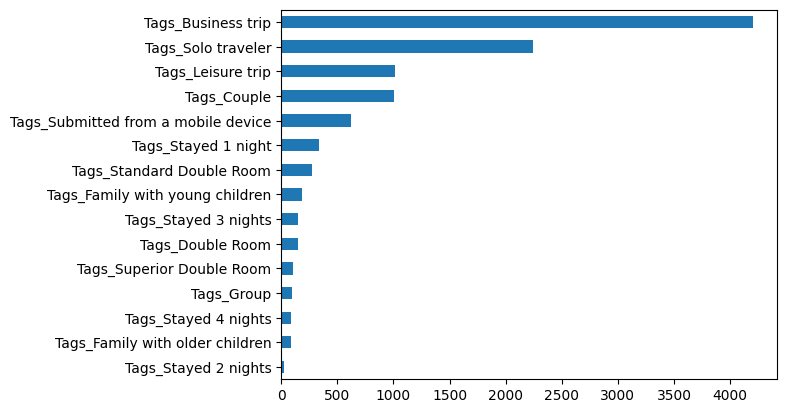

In [ ]:
# ОЦеним влияние Tags

List_FamosTags=[

"Tags_Leisure trip" ,
"Tags_Submitted from a mobile device",
"Tags_Couple",
"Tags_Stayed 1 night",
"Tags_Stayed 2 nights",
"Tags_Solo traveler",
"Tags_Stayed 3 nights",
"Tags_Business trip",
"Tags_Group",
"Tags_Family with young children",
"Tags_Stayed 4 nights",
"Tags_Double Room",
"Tags_Standard Double Room",
"Tags_Superior Double Room",
"Tags_Family with older children"
]

cat_cols =List_FamosTags


from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<Axes: >

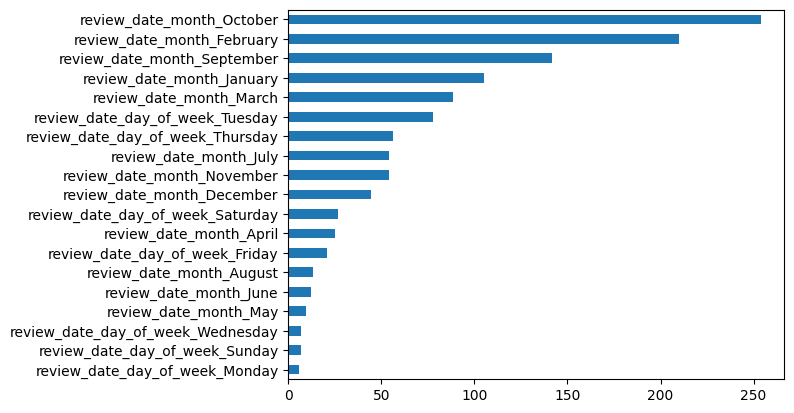

In [ ]:
List_review_date= [
 "review_date_day_of_week_Friday",
 "review_date_day_of_week_Thursday",
 "review_date_day_of_week_Tuesday",
 "review_date_day_of_week_Saturday",
 "review_date_day_of_week_Wednesday",
 "review_date_day_of_week_Monday",
 "review_date_day_of_week_Sunday",
 "review_date_month_February",
 "review_date_month_January",
 "review_date_month_October",
 "review_date_month_September",
 "review_date_month_March",
 "review_date_month_December",
 "review_date_month_May",
 "review_date_month_November",
 "review_date_month_June",
 "review_date_month_July",
 "review_date_month_April",
 "review_date_month_August"
 ]

cat_cols =List_review_date


from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<Axes: >

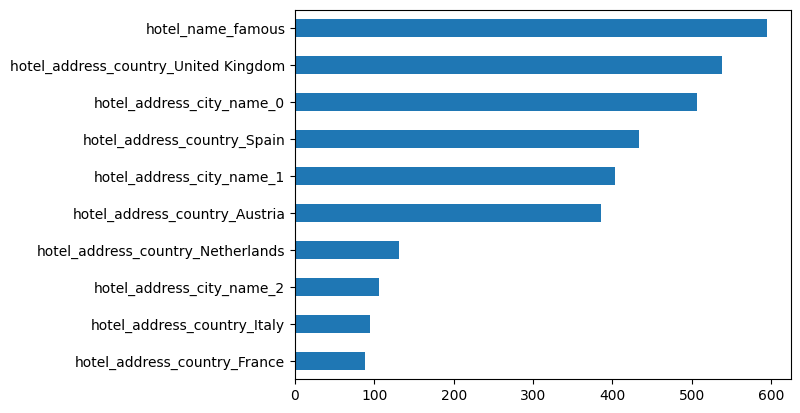

In [ ]:
List_hotel_name= ["hotel_name_famous",
"hotel_address_country_United Kingdom",
"hotel_address_country_France",
"hotel_address_country_Netherlands",
"hotel_address_country_Italy",
"hotel_address_country_Austria",
"hotel_address_country_Spain",
"hotel_address_city_name_0",
"hotel_address_city_name_1",
"hotel_address_city_name_2"]



cat_cols =List_hotel_name


from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<Axes: >

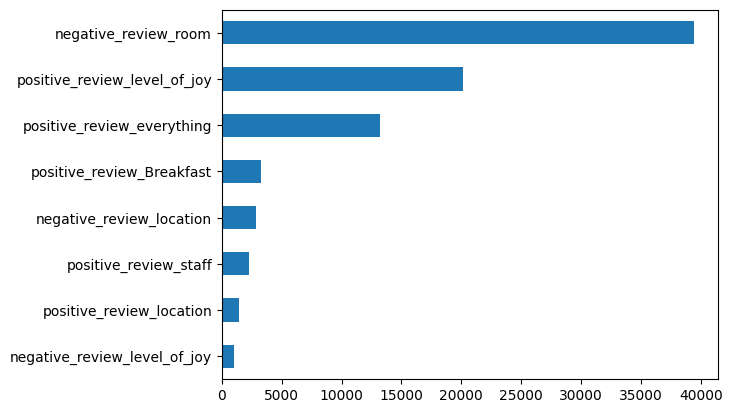

In [ ]:
List_positive_review= ["positive_review_level_of_joy",
"positive_review_location",
"positive_review_everything",
"positive_review_Breakfast",
"positive_review_staff",
"negative_review_level_of_joy",
"negative_review_location",
"negative_review_room"]

cat_cols =List_positive_review


from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')



<Axes: >

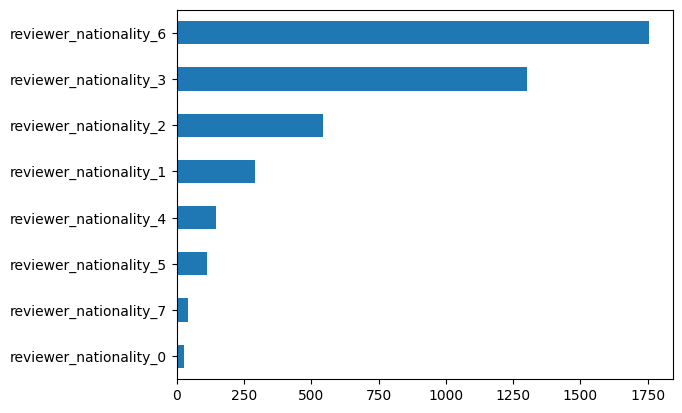

In [ ]:

List_positive_reviewer_nationality= ["reviewer_nationality_0",
"reviewer_nationality_1",
"reviewer_nationality_2",
"reviewer_nationality_3",
"reviewer_nationality_4",
"reviewer_nationality_5",
"reviewer_nationality_6",
"reviewer_nationality_7"]

cat_cols =List_positive_reviewer_nationality


from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')


In [ ]:
# Достанем из таблицы Отелей  все столбцы которые являются категориальными - это не сложно  -Количество уникальных значений в  них 2   это 0 и 1

List_CAtColls=hotels.nunique()[hotels.nunique()<=2].index


60


<Axes: >

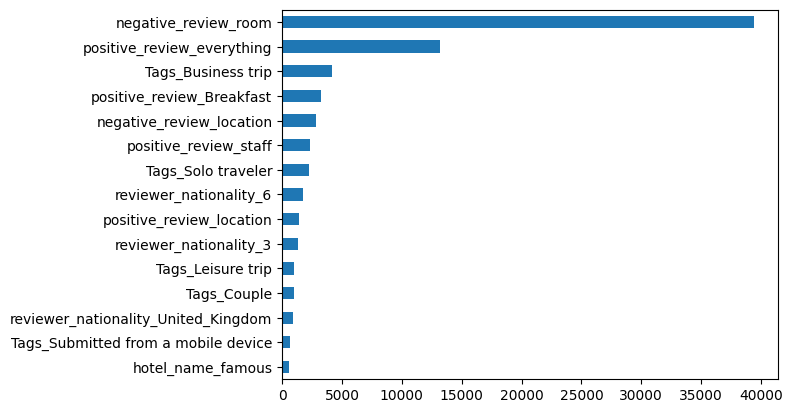

In [ ]:
# List_CAtColls=[

# "Tags_Leisure trip" ,
# "Tags_Submitted from a mobile device",
# "Tags_Couple",
# "Tags_Stayed 1 night",
# "Tags_Stayed 2 nights",
# "Tags_Solo traveler",
# "Tags_Stayed 3 nights",
# "Tags_Business trip",
# "Tags_Group",
# "Tags_Family with young children",
# "Tags_Stayed 4 nights",
# "Tags_Double Room",
# "Tags_Standard Double Room",
# "Tags_Superior Double Room",
# "Tags_Family with older children",
#  "review_date_day_of_week_Friday",
#  "review_date_day_of_week_Thursday",
#  "review_date_day_of_week_Tuesday",
#  "review_date_day_of_week_Saturday",
#  "review_date_day_of_week_Wednesday",
#  "review_date_day_of_week_Monday",
#  "review_date_day_of_week_Sunday",
#  "review_date_month_February",
#  "review_date_month_January",
#  "review_date_month_October",
#  "review_date_month_September",
#  "review_date_month_March",
#  "review_date_month_December",
#  "review_date_month_May",
#  "review_date_month_November",
#  "review_date_month_June",
#  "review_date_month_July",
#  "review_date_month_April",
#  "review_date_month_August",
#  "hotel_name_famous",
# "hotel_address_country_United Kingdom",
# "hotel_address_country_France",
# "hotel_address_country_Netherlands",
# "hotel_address_country_Italy",
# "hotel_address_country_Austria",
# "hotel_address_country_Spain",
# "hotel_address_city_name_0",
# "hotel_address_city_name_1",
# "hotel_address_city_name_2",
# "positive_review_level_of_joy",
# "positive_review_location",
# "positive_review_everything",
# "positive_review_Breakfast",
# "positive_review_staff",
# "negative_review_level_of_joy",
# "negative_review_location",
# "negative_review_room",
# "reviewer_nationality_0",
# "reviewer_nationality_1",
# "reviewer_nationality_2",
# "reviewer_nationality_3",
# "reviewer_nationality_4",
# "reviewer_nationality_5",
# "reviewer_nationality_6",
# "reviewer_nationality_7"]


print(len(List_CAtColls))

cat_cols =List_CAtColls

# chi2(X[cat_cols], y)[0]


from sklearn.feature_selection import chi2 # хи-квадрат

# Из всех признаков возьмём только 15 первых самых влиятельных

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols).sort_values(ascending=False).iloc[0:15]
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [ ]:
imp_cat

,0
hotel_name_famous,595.428789
Tags_Submitted from a mobile device,625.486638
reviewer_nationality_United_Kingdom,948.004194
Tags_Couple,1001.181753
Tags_Leisure trip,1010.958848
reviewer_nationality_3,1302.852727
positive_review_location,1402.957978
reviewer_nationality_6,1756.648613
Tags_Solo traveler,2247.654889
positive_review_staff,2298.183954


Возьмём первые 15  признаков по влиянию на целевую переменную
Среди этих признаков есть признаки которые учавствовали в бинарном кодировании. Надо забрать признак со всеми его столбцами

In [ ]:
# Достанем из столбца самых влиятельных  признаков признаки из Бинарного кодироввания
# Они имеют шаблон  у них на конце всегда есть число

Regex_pattern=".{1,}_\d{1,}$"



imp_cat=pd.DataFrame(imp_cat)

# index_hotels_corr_max=hotels_corr_max.index
# index_hotels_corr_max=pd.DataFrame(index_hotels_corr_max)
# index_hotels_corr_max["bin_collstatus"]=index_hotels_corr_max[0].apply(lambda x  :   re.fullmatch(Regex_pattern,   x) is None)
# index_hotels_corr_max=index_hotels_corr_max[index_hotels_corr_max["bin_collstatus"]][0]
imp_cat["index_names"]=imp_cat.index

imp_cat["din_colls"]=imp_cat["index_names"].apply(lambda x  :   re.fullmatch(Regex_pattern,   x) is None)

# Получим список тех столбцов в которые учавствовали в бинарном кодировании
list_of_bin_index=imp_cat[imp_cat["din_colls"]==False].index


# Теперь "оторвём" у них число
Regex_pattern_2="_\d{1,}$"


imp_cat.loc[list_of_bin_index,"index_names"]=imp_cat.loc[list_of_bin_index,"index_names"].apply(lambda x: re.sub(Regex_pattern_2, "", x , count=0)  )

# сОБЕРЁМ ВО МНОЖЕСТВО ПОЛУЧИВШИЕСЯ НАЗВАНИЯ

set_of_bin_index=set(imp_cat[imp_cat["din_colls"]==False]["index_names"])




In [ ]:
# Теперь достанем все названия столбцов  из бинарного кодирования соответствущие данному шаблону

itog_list=[]

name_Bin_Coll='reviewer_nationality'


for name_Bin_Coll  in set_of_bin_index:

  Regex_pattern=name_Bin_Coll+"_\d{1,}$"
  pattern=re.compile(Regex_pattern)

  cleaned_list=[item for item in hotels.columns if  pattern.match(item)]
  itog_list=itog_list + cleaned_list



In [ ]:
# Соберём в список  все названия столбцов которые  максимально влияют на целевой столбец

List_itog_bin_CaT_coll=list(set(itog_list)|set(imp_cat.index))

List_itog_bin_CaT_coll

['positive_review_everything',
 'Tags_Leisure trip',
 'positive_review_Breakfast',
 'Tags_Solo traveler',
 'reviewer_nationality_1',
 'positive_review_staff',
 'reviewer_nationality_5',
 'Tags_Couple',
 'reviewer_nationality_2',
 'reviewer_nationality_United_Kingdom',
 'Tags_Submitted from a mobile device',
 'reviewer_nationality_7',
 'hotel_name_famous',
 'reviewer_nationality_0',
 'negative_review_room',
 'reviewer_nationality_3',
 'reviewer_nationality_4',
 'reviewer_nationality_6',
 'Tags_Business trip',
 'negative_review_location',
 'positive_review_location']

# Оценим влияние непрерывных признаков на целевую переменную

In [ ]:
# Достанем из таблицы оставшиеся  столбцы и убедимся что остались только не прерывные признаки

list_Num_Colls=set(hotels.columns)-set(List_CAtColls)
list_Num_Colls.remove('reviewer_score')
list_Num_Colls=list(list_Num_Colls)

<Axes: >

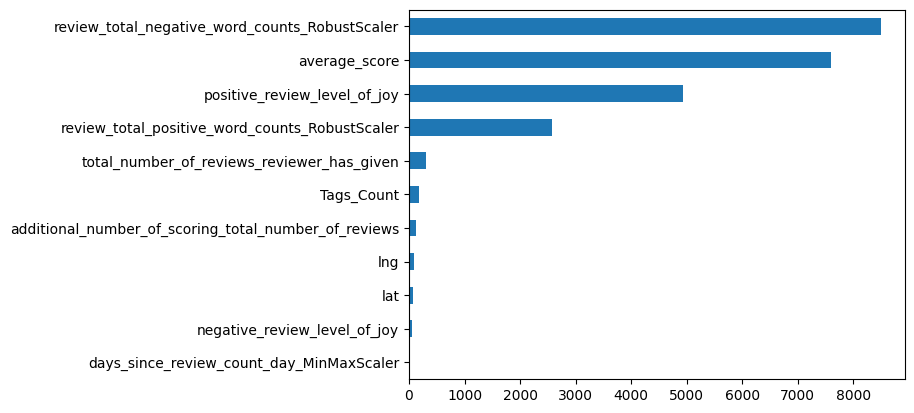

In [ ]:
from sklearn.feature_selection import f_classif # anova

num_cols = list_Num_Colls


imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Так как на надо выбрать только влиятельные признаки то будем сравнивать их со среднем аремфетическим - так отстоющие точно отсеятся

In [ ]:
# Заберём только те столбцы которые больше стредненего аремфметичкеского умноженного на 0.5
list_Num_Colls=list(imp_num[imp_num>imp_num.mean()*0.5].index)


In [ ]:
# Соберём в один список все элементы

itog_list=List_itog_bin_CaT_coll+list_Num_Colls


In [ ]:
itog_list

['positive_review_everything',
 'Tags_Leisure trip',
 'positive_review_Breakfast',
 'Tags_Solo traveler',
 'reviewer_nationality_1',
 'positive_review_staff',
 'reviewer_nationality_5',
 'Tags_Couple',
 'reviewer_nationality_2',
 'reviewer_nationality_United_Kingdom',
 'Tags_Submitted from a mobile device',
 'reviewer_nationality_7',
 'hotel_name_famous',
 'reviewer_nationality_0',
 'negative_review_room',
 'reviewer_nationality_3',
 'reviewer_nationality_4',
 'reviewer_nationality_6',
 'Tags_Business trip',
 'negative_review_location',
 'positive_review_location',
 'review_total_positive_word_counts_RobustScaler',
 'positive_review_level_of_joy',
 'average_score',
 'review_total_negative_word_counts_RobustScaler']

In [ ]:
# теперь округлим числовые признаки до 2 знаков после запятой
hotels[list_Num_Colls]=hotels[list_Num_Colls].round(2)

# Заного переопределим модель

In [ ]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)
X = hotels.drop(['reviewer_score'], axis = 1)
# Оставим в X только ранее отобранные признаки
X = X[itog_list]
y = hotels['reviewer_score']


# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)


MAPE: 0.14138286324223787  -было - чем меньше тем лучше
0.10-  это хороший результат

0.1356038539096172  - переработал теги

0.1348252196321253  - добавил признак накрутки оценки

 0.13478048811182666

 разобрали признак города  0.13484628373241422

 разбор признака  положительный  комментарий    0.13198419052564622

  разбор признака  отрицательный   комментарий 0.12936184744934814

  небольшие изменения  2024.09.20   0.12929963000454497

  добавил признак имени отеля 0.12933506850745852
  добавил коэффициент соотношения количества оценок без комментариев  делённых на  общее количество комментов  0.12840096458482814

  После отбора  признаков 0.1302808624382943



In [ ]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.13307289761001523


# Итог
